In [5]:
import pandas as pd
df = pd.read_csv(r"C:\Users\MY PC\Downloads\Sample_sales_Dataset.csv")

In [6]:
print(df)

    OrderID     Customer Region     Category  Sales  Quantity  Discount
0         1   Customer_1   East  Electronics    113         2      0.05
1         2   Customer_2   West    Furniture    127         3      0.10
2         3   Customer_3  South     Clothing    140         4      0.15
3         4   Customer_4  North      Grocery    154         5      0.20
4         5   Customer_5   East  Electronics    167         6      0.00
..      ...          ...    ...          ...    ...       ...       ...
95       96   Customer_6  North      Grocery    496         6      0.05
96       97   Customer_7   East  Electronics    509         7      0.10
97       98   Customer_8   West    Furniture    523         1      0.15
98       99   Customer_9  South     Clothing    536         2      0.20
99      100  Customer_10  North      Grocery    550         3      0.00

[100 rows x 7 columns]


In [11]:
print("simple EDA-1")
df.shape
df.info()
df.describe()
df.head(10)

simple EDA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   OrderID   100 non-null    int64  
 1   Customer  100 non-null    object 
 2   Region    100 non-null    object 
 3   Category  100 non-null    object 
 4   Sales     100 non-null    int64  
 5   Quantity  100 non-null    int64  
 6   Discount  100 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 5.6+ KB


,OrderID,Customer,Region,Category,Sales,Quantity,Discount
0,1,Customer_1,East,Electronics,113,2,0.05
1,2,Customer_2,West,Furniture,127,3,0.10
2,3,Customer_3,South,Clothing,140,4,0.15
3,4,Customer_4,North,Grocery,154,5,0.20
4,5,Customer_5,East,Electronics,167,6,0.00
5,6,Customer_6,West,Furniture,181,7,0.05
6,7,Customer_7,South,Clothing,194,1,0.10
7,8,Customer_8,North,Grocery,208,2,0.15
8,9,Customer_9,East,Electronics,221,3,0.20
9,10,Customer_10,West,Furniture,235,4,0.00


In [14]:
df.duplicated().sum()

np.int64(0)

In [17]:
df["Region"].unique()

array(['East', 'West', 'South', 'North'], dtype=object)

In [18]:
df["Category"].unique()

array(['Electronics', 'Furniture', 'Clothing', 'Grocery'], dtype=object)

In [19]:
df["Customer"].unique()

array(['Customer_1', 'Customer_2', 'Customer_3', 'Customer_4',
       'Customer_5', 'Customer_6', 'Customer_7', 'Customer_8',
       'Customer_9', 'Customer_10', 'Customer_11', 'Customer_12',
       'Customer_13', 'Customer_14', 'Customer_0'], dtype=object)

In [20]:
df["Customer"].nunique()

15

In [22]:
df["Sales"].max()

np.int64(991)

In [23]:
df["Sales"].min()

np.int64(104)

In [24]:
df["Quantity"].max()

np.int64(7)

In [25]:
df["Quantity"].min()

np.int64(1)

In [26]:
df["Discount"].max()

np.float64(0.2)

In [31]:
print("EDA-2")
print("Sales by Region")
df.groupby("Region")["Sales"].sum()

EDA-2
Sales by Region


Region
East     11825
North    11950
South    11600
West     12175
Name: Sales, dtype: int64

In [32]:
print("Average sales by Category")
df.groupby("Category")["Sales"].mean()

Average sales by Category


Category
Clothing       464.0
Electronics    473.0
Furniture      487.0
Grocery        478.0
Name: Sales, dtype: float64

In [40]:
print("sales by customer")
df.groupby("Customer")["Sales"].sum()

sales by customer


Customer
Customer_0     3051
Customer_1     3245
Customer_10    3196
Customer_11    2727
Customer_12    2808
Customer_13    2889
Customer_14    2970
Customer_2     3340
Customer_3     3434
Customer_4     3529
Customer_5     3623
Customer_6     3718
Customer_7     2912
Customer_8     3007
Customer_9     3101
Name: Sales, dtype: int64

In [43]:
print("Total_sales__Before_discount")
df["Total_sales"] = df["Sales"]
df["Total_sales"].sum()

Total_sales__Before_discount


np.int64(47550)

In [38]:
df["Customer"].value_counts()

Customer
Customer_1     7
Customer_2     7
Customer_3     7
Customer_4     7
Customer_5     7
Customer_6     7
Customer_7     7
Customer_8     7
Customer_9     7
Customer_10    7
Customer_11    6
Customer_12    6
Customer_13    6
Customer_14    6
Customer_0     6
Name: count, dtype: int64

In [42]:
print("Total_sales_after_discount")
df["Revenue"] = df["Sales"]*(1-df["Discount"])
df["Revenue"].sum()

Total_sales_after_discount


np.float64(42840.00000000001)

In [44]:
print("Top 5 orders by revenue")
df.nlargest(5, "Revenue")

Top 5 orders by revenue


,OrderID,Customer,Region,Category,Sales,Quantity,Discount,Total_sales,Revenue
64,65,Customer_5,East,Electronics,977,3,0.00,977,977.00
65,66,Customer_6,West,Furniture,991,4,0.05,991,941.45
59,60,Customer_0,North,Grocery,910,5,0.00,910,910.00
60,61,Customer_1,East,Electronics,923,6,0.05,923,876.85
61,62,Customer_2,West,Furniture,937,7,0.10,937,843.30


In [46]:
print("Insights_generation (Visuals)")

Insights_generation (Visuals)


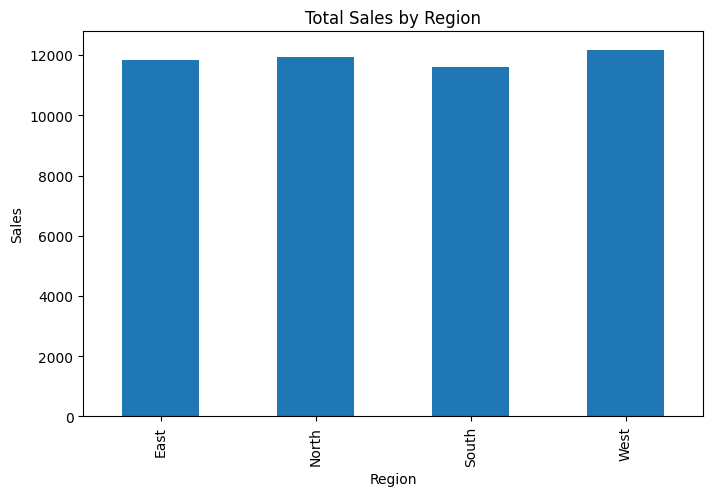

In [49]:
import matplotlib.pyplot as plt

region_sales = df.groupby("Region")["Sales"].sum()

plt.figure(figsize=(8,5))
region_sales.plot(kind="bar")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Sales")
plt.show()


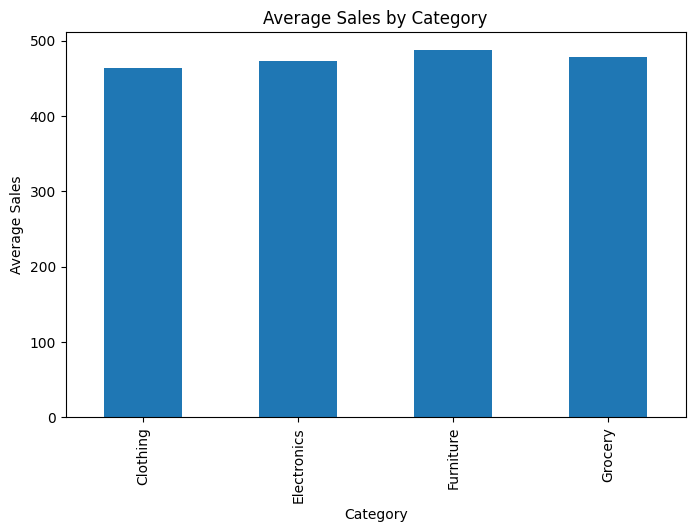

In [50]:
category_avg = df.groupby("Category")["Sales"].mean()

plt.figure(figsize=(8,5))
category_avg.plot(kind="bar")
plt.title("Average Sales by Category")
plt.xlabel("Category")
plt.ylabel("Average Sales")
plt.show()


<Figure size 800x500 with 0 Axes>

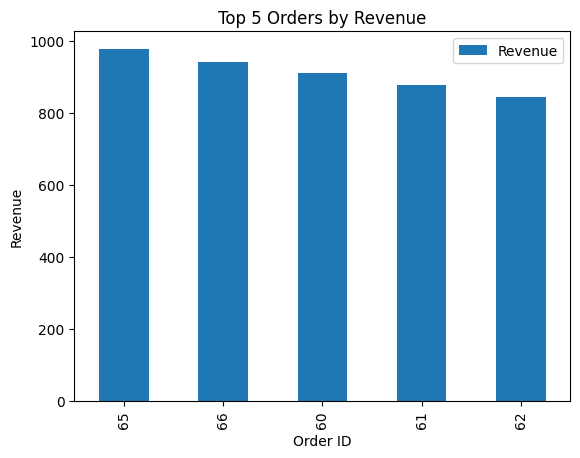

In [51]:
top5 = df.nlargest(5, "Revenue")[["OrderID", "Revenue"]].set_index("OrderID")

plt.figure(figsize=(8,5))
top5.plot(kind="bar")
plt.title("Top 5 Orders by Revenue")
plt.xlabel("Order ID")
plt.ylabel("Revenue")
plt.show()


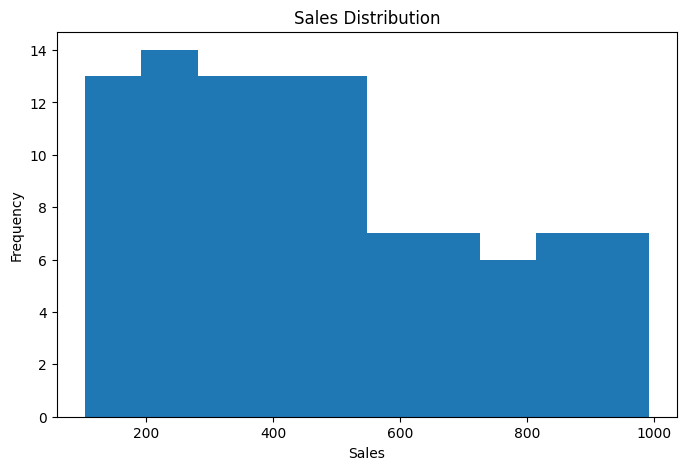

In [52]:
plt.figure(figsize=(8,5))
plt.hist(df["Sales"])
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


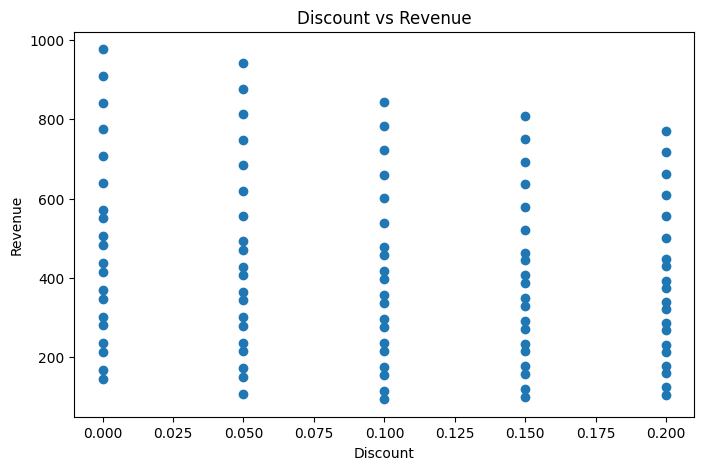

In [53]:
plt.figure(figsize=(8,5))
plt.scatter(df["Discount"], df["Revenue"])
plt.title("Discount vs Revenue")
plt.xlabel("Discount")
plt.ylabel("Revenue")
plt.show()


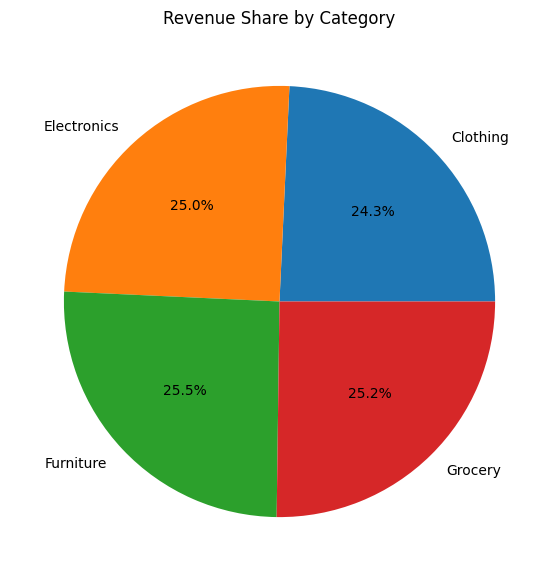

In [54]:
category_revenue = df.groupby("Category")["Revenue"].sum()

plt.figure(figsize=(7,7))
plt.pie(category_revenue, labels=category_revenue.index, autopct="%1.1f%%")
plt.title("Revenue Share by Category")
plt.show()


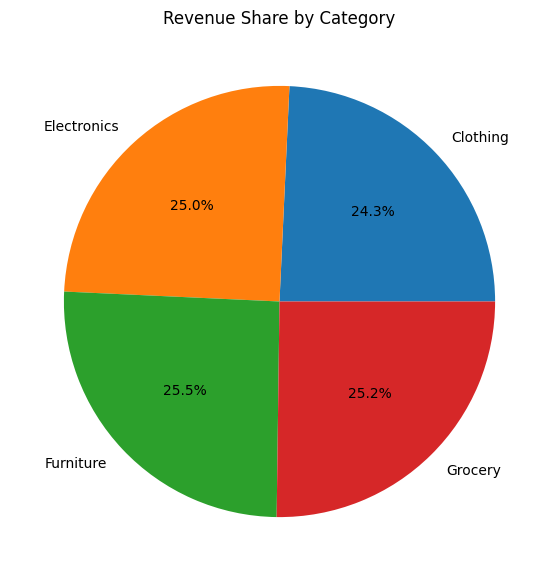

In [55]:
category_revenue = df.groupby("Category")["Revenue"].sum()

plt.figure(figsize=(7,7))
plt.pie(category_revenue, labels=category_revenue.index, autopct="%1.1f%%")
plt.title("Revenue Share by Category")
plt.show()


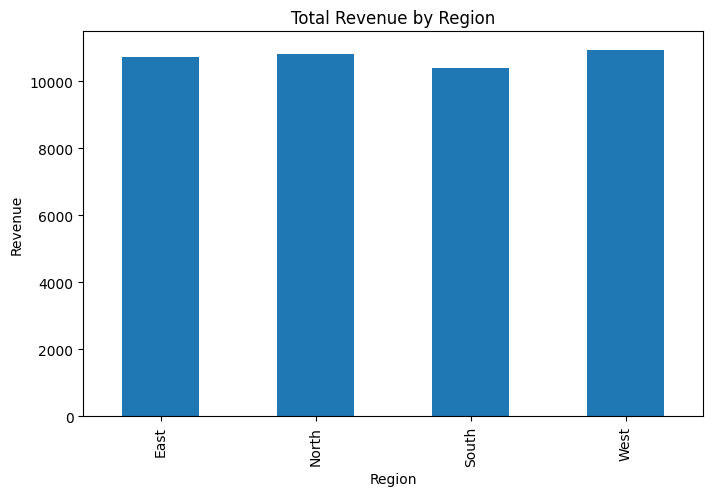

In [56]:
region_revenue = df.groupby("Region")["Revenue"].sum()

plt.figure(figsize=(8,5))
region_revenue.plot(kind="bar")
plt.title("Total Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Revenue")
plt.show()
